# Python Kaiser Window with beta=8
Just take an audio signal and read it into Python, and filter it with our previous low pass filter with Kaiser Window.

`-Gerard Schuler`

## Read in audio file:

In [1]:
import scipy.io.wavfile as wav
import numpy as np

fs, x = wav.read('sc03.wav')

## Listen to it:

In [2]:
from sound import sound
sound(x, fs)

* done


## Look at its spectrum:

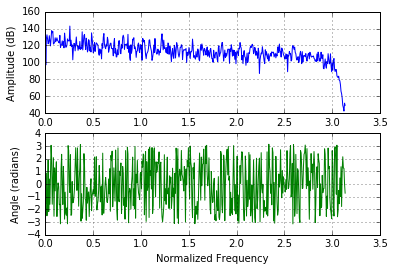

In [3]:
from freqz import freqz
freqz(x)

## Now we low-pass filter using Kaiser Window:

In [4]:
n = np.arange(32)

## Ideal Impulse response:

In [5]:
h = np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5))

## Kaiser Window:

In [6]:
hk = np.kaiser(32,8)

## Multiply ideal filter and Kaiser window:

In [7]:
hfilt = hk * h

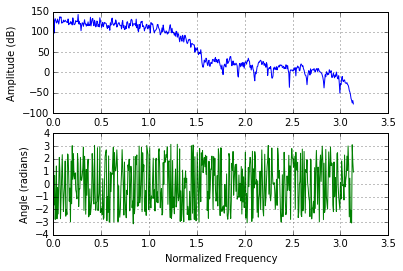

In [8]:
xlp = np.convolve(x, hfilt)

freqz(xlp)

* **Observe that we have indeed much attenuation and hardly any signal left.**
## Listen to the low pass version:

In [9]:
sound(xlp, fs)

* done


* **Now we can down-sample it by a factor of N=2, including the removal of the zeros, using the Python indexing(array slicing) trick (increasing indices be 2 instead of 1),**

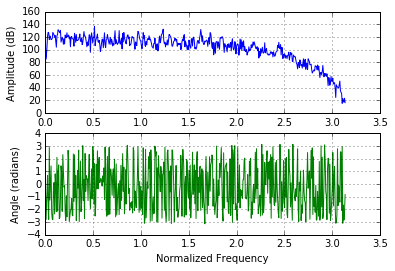

In [10]:
xds = xlp[0::2]
freqz(xds)

**Observe that we now obtain the “streched” spectrum.**

## Listen to it:

In [11]:
sound(xds,fs/2)

* done


* **It should sound more “muffled”, but otherwise the same, but at now half the sampling rate!**

* **Now we can upsample again, using the same indexing trick, now just on the receiving side, effectively inserting a zero after each sample.**

* **Observe that in this way we can avoid the function “downsample” or “upsample”, which makes it clearer to see and check what happens,**

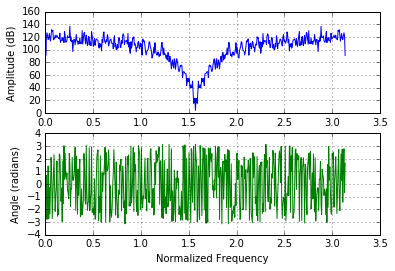

In [12]:
xups = np.zeros(2*len(xds),)
xups[0::2] = xds

freqz(xups)

* **Observe the “shrinking” and periodic continuation of the spectrum, the aliasing component at the high frequencies.**

## Listen to the signal including aliasing:

In [13]:
sound(xups, fs)

* done


## Now low pass filter the result:

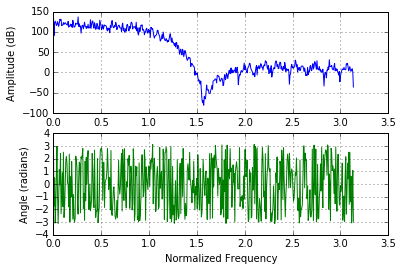

In [14]:
xupslp = np.convolve(xups,hfilt)

freqz(xupslp)

* **Observe that now we removed the aliasing component at high frequencies.**

## Now listen to it:

In [15]:
sound(xupslp,fs)

* done


* **Observe: it should now sound the same as at the lower sampling rate, but now at the higher sampling rate of 32 kHz! (Possible differences are due to not sufficiently attenuated aliasing).**